LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.

- Lower memory usage.

- Better accuracy.

- Support of parallel, distributed, and GPU learning.

- Capable of handling large-scale data.

In [1]:
!pip install mlbox


     |████████████████████████████████| 20.2 MB 1.3 MB/s 
     |████████████████████████████████| 13.0 MB 26.7 MB/s 
     |████████████████████████████████| 1.9 MB 37.4 MB/s 
     |████████████████████████████████| 10.4 MB 31.2 MB/s 
     |████████████████████████████████| 294 kB 40.0 MB/s 
     |████████████████████████████████| 7.0 MB 29.9 MB/s 
     |████████████████████████████████| 86.3 MB 24 kB/s 
     |████████████████████████████████| 1.2 MB 29.0 MB/s 
     |████████████████████████████████| 4.3 MB 23.0 MB/s 
     |████████████████████████████████| 103 kB 60.4 MB/s 
     |████████████████████████████████| 1.7 MB 21.6 MB/s 
     |████████████████████████████████| 3.8 MB 22.3 MB/s 
     |████████████████████████████████| 449 kB 57.1 MB/s 
     |████████████████████████████████| 50 kB 4.7 MB/s 
  Created wheel for mlbox: filename=mlbox-0.8.5-py3-none-any.whl size=43755 sha256=0bfa911a7eed196d34103c7b3d3f2e76c93979a87aeb283c3e2889781e307513
  Stored in directory: /root/.cache/pip/w

In [1]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [2]:
from numpy.random import RandomState
import pandas as pd

df = pd.read_csv('/content/diabetes2.csv')
rng = RandomState()

train = df.sample(frac=0.7, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

In [3]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [4]:
paths = ["/content/train.csv","/content/test.csv"]
target_name = "Outcome"

In [5]:
rd = Reader(sep = ",")
df = rd.train_test_split(paths, target_name)


reading csv : train.csv ...
cleaning data ...
CPU time: 5.495320796966553 seconds

reading csv : test.csv ...
cleaning data ...
CPU time: 0.05363774299621582 seconds

You have no test dataset !

> Number of common features : 8

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 0
> Number of numerical features: 8
> Number of training samples : 768
> Number of test samples : 0

> You have no missing values on train set...

> Task : classification
0.0    500
1.0    268
Name: Outcome, dtype: int64

encoding target ...


In [6]:
#Defining Optimiser
opt = Optimiser(scoring = "accuracy", n_folds = 5)
#Defining the model
space = {
'est__strategy':{"search":"choice",
"space":["LightGBM"]},
'est__n_estimators':{"search":"choice",
"space":[150]},
'est__colsample_bytree':{"search":"uniform",
"space":[0.8,0.95]},
'est__subsample':{"search":"uniform",
"space":[0.8,0.95]},
'est__max_depth':{"search":"choice",
"space":[5,6,7,8,9]},
'est__learning_rate':{"search":"choice",
"space":[0.07]}
}
params = opt.optimise(space, df,15)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.825445346876507, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9043813302001803, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


MEAN SCORE : accuracy = 0.7487479840421016
VARIANCE : 0.02369042836474475 (fold 1 = 0.7597402597402597, fold 2 = 0.7142857142857143, fold 3 = 0.7337662337662337, fold 4 = 0.7516339869281046, fold 5 = 0.7843137254901961)
CPU time: 0.678062915802002 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.920948268830203, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.8503726317937795, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'su


fitting the pipeline ...
CPU time: 0.0971684455871582 seconds


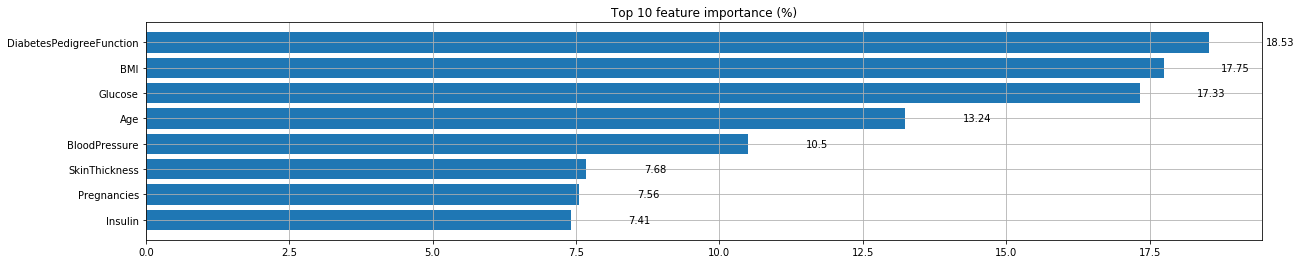


> Feature importances dumped into directory : save


/usr/local/lib/python3.7/dist-packages/mlbox/prediction/predictor.py:405: UserWarning: You have no test dataset. Cannot predict !
  warnings.warn("You have no test dataset. Cannot predict !")


In [8]:
prd = Predictor()
prd.fit_predict(params, df);